# Wissensbasierte Systeme 
## ML-Übung #1 "Nächste Nachbarn" und "Random Forest"

**Dozenten:** Dr. Sina Keller, M.sc. Felix Riese

**Datum:** 22.11.2017

**Datensatz:** EnMAP-Contest, [Download der Daten](http://www2.ipf.kit.edu/Projekte/code/EnMAP_Contest.zip) mit [Beschreibung](https://www.ipf.kit.edu/downloads/Instructions_EnMAP_Contest.pdf)

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import h5py
import matplotlib.pyplot as plt

### 1. Einlesen des Datensatzes
Der Datensatz `EnMAP_Contest_Data.mat` wurde heruntergeladen in das Verzeichnis dieses Notebooks.

In [2]:
datadict = {}
with h5py.File("EnMAP_Contest_Data.mat", 'r') as f:
    for k, v in f.items():
        datadict[k] = np.array(v)

print(datadict.keys())

dict_keys(['Im', 'cm', 'lx', 'ly', 'xi', 'yi'])


In [3]:
print("{varname:<10} | {value:<20}".format(varname="Variable", value="Shape"))
print("-"*30)
for key in datadict.keys():
    print("{varname:<10} | {value:<20}".format(varname=key, value=str(len(datadict[key]))+" x " + str(len(datadict[key][0]))))

Variable   | Shape               
------------------------------
Im         | 244 x 1000000       
cm         | 3 x 21              
lx         | 1 x 2617            
ly         | 1 x 1124            
xi         | 244 x 2617          
yi         | 244 x 1124          


### Überblick über den Datensatz
- Ein paar Zeilen anschauen mit .head(5) und .tail(5)
- Größe des Datensatzes und Anzahl möglicher Klassen herausfinden
- Datensatz geeignet visualisieren in mehreren Plots
- Karte "Im" geeignet visualisieren mit entsprechender Klasse

In [4]:
pixels = []
for i in range(len(datadict["xi"][0])):
    features = [row[i] for row in datadict["xi"]]
    pixels.append(features)
    
print(pixels[0])

[0.037908496732026141, 0.046936114732724903, 0.044871794871794872, 0.036386449184441658, 0.050868486352357321, 0.046798029556650245, 0.039119804400977995, 0.040048543689320391, 0.042219541616405308, 0.050239234449760764, 0.062870699881376044, 0.071596244131455405, 0.0675990675990676, 0.080645161290322578, 0.066134549600911655, 0.084080717488788551, 0.072847682119204712, 0.078602620087335623, 0.060869565217390821, 0.033261802575107038, 0.0084656084656084003, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00063761955366631047, 0.0, 0.0, 0.00021244954323348139, 0.0, 0.0012870012870012831, 0.0, 0.0010736525660296294, 0.00021399529210357305, 0.000418760469011724, 0.0080034609560890937, 0.0, 0.0024022712382616215, 0.0078521939953810366, 0.0, 0.0018083182640144606, 0.0, 0.0, 0.00063884156729

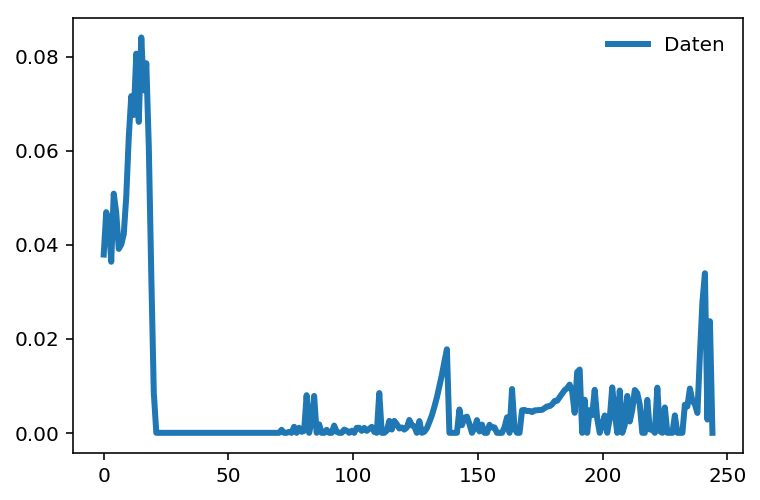

In [5]:
x = np.linspace(0, 244, len(pixels[0]))
y = pixels[0]

plt.plot(x, y, linewidth=3, label="Daten")
plt.legend(loc="best", frameon=False)
plt.show()

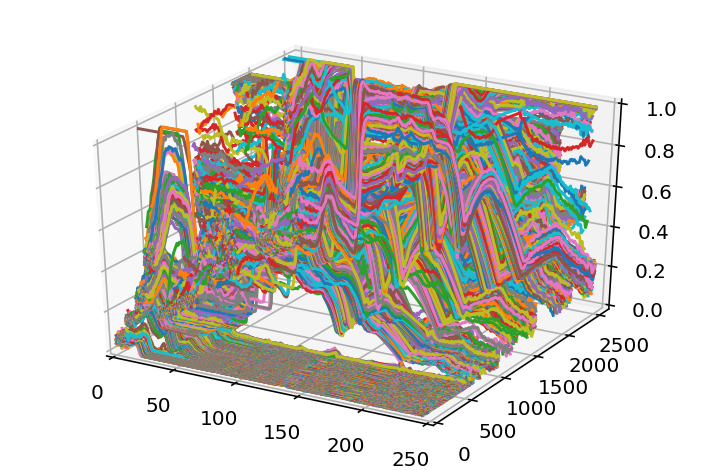

In [6]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.gca(projection='3d')

for z in range(len(pixels)):
    ax.plot(x, pixels[z], z, zdir="y")
    
ax.set_xlim(0, 250)
ax.set_ylim(0, 2600)
ax.set_zlim(0, 1)

plt.show()